In [3]:
# from datascience import * 

# we don't need the datascience module, do we? if so we have to import it into every student's
# Anaconda install

from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Data

For this lab, we'll be using the American National Election Studies (ANES) data from the 2016 election. The codebook is available here: http://www.electionstudies.org/studypages/anes_pilot_2016/anes_pilot_2016_CodebookUserGuide.pdf

****name everything after the lab meeting number, and**** 
### we don't want to use the Pilot Study 
****we want to use the regular dataset, although pedagogicially not key****

In [4]:
anes = pd.read_csv('../data/anes/anes_pilot_2016.csv')
anes.head()

,version,caseid,weight,weight_spss,follow,turnout12,turnout12b,vote12,percent16,meet,...,flag_asianam10,flag_nativeam10,flag_other10,starttime,endtime,optintimestamp,count,ua,browser,os
0,ANES 2016 Pilot Study version 20160223,1,0.951160,0.542161,1,1,9,2,100,1,...,0,0,0,1/22/2016,1/22/2016,,173,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:43.0) G...,Firefox 43,Windows 7
1,ANES 2016 Pilot Study version 20160223,2,2.670196,1.522012,2,2,9,9,50,4,...,0,0,0,1/22/2016,1/22/2016,,87,Mozilla/5.0 (Linux; Android 6.0; LGLS991 Build...,Chrome 47,Android Linux 6.0
2,ANES 2016 Pilot Study version 20160223,3,1.430390,0.815322,1,1,9,1,100,1,...,0,0,0,1/22/2016,1/22/2016,,86,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,Safari 9,Mac OS X 10.9
3,ANES 2016 Pilot Study version 20160223,4,0.913966,0.520961,1,1,9,2,100,5,...,0,0,0,1/22/2016,1/22/2016,,211,Mozilla/5.0 (Android 5.1.1; Mobile; rv:43.0) G...,Firefox 43,Android 5.1
4,ANES 2016 Pilot Study version 20160223,5,0.263935,0.150443,1,1,9,1,100,2,...,0,0,0,1/23/2016,1/23/2016,,342,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,Safari 9,iPhone iOS 9.2


## Exploratory Data Analysis

Refer back to lab 1 for help plotting histograms. **Error: Lab 2 since they are keyed to class meetings**

**Also, the variables here are different, since this is the csv file made from the ANES Pilot Study. Does not matter for the Python or Pandas tasks at hand, but bear in mind it is different data here!**

In [5]:
# we need to find out what variables are in the .csv file that has been 
#    read into the dataframe anes
# there is probably a way to select the columns that just have 'obama' in them

print(anes.columns.values)

['version' 'caseid' 'weight' 'weight_spss' 'follow' 'turnout12'
 'turnout12b' 'vote12' 'percent16' 'meet' 'givefut' 'info' 'march' 'sign'
 'give12mo' 'compromise' 'ftobama' 'ftblack' 'ftwhite' 'fthisp' 'ftgay'
 'ftjeb' 'fttrump' 'ftcarson' 'fthrc' 'ftrubio' 'ftcruz' 'ftsanders'
 'ftfiorina' 'ftpolice' 'ftfem' 'fttrans' 'ftmuslim' 'ftsci' 'reg'
 'demcand' 'repcand' 'vote16jb' 'vote16bc' 'vote16tc' 'vote16mr' 'vote16dt'
 'presjob' 'lazyb' 'lazyw' 'lazyh' 'lazym' 'violentb' 'violentw' 'violenth'
 'violentm' 'econnow' 'econ12mo' 'pid1d' 'pid2d' 'pid1r' 'pid2r' 'pidstr'
 'pidlean' 'lcself' 'lcd' 'lcr' 'lchc' 'lcbo' 'lcdt' 'lcmr' 'lctc'
 'ISSUES_OC14_1' 'ISSUES_OC14_2' 'ISSUES_OC14_3' 'ISSUES_OC14_4'
 'ISSUES_OC14_5' 'ISSUES_OC14_6' 'ISSUES_OC14_7' 'ISSUES_OC14_8'
 'ISSUES_OC14_9' 'ISSUES_OC14_10' 'ISSUES_OC14_11' 'ISSUES_OC14_12'
 'ISSUES_OC14_13' 'ISSUES_OC14_14' 'ISSUES_OC14_15' 'ISSUES_OC14_16'
 'ISSUES_OC14_17' 'ISSUES_OC14_18' 'ISSUES_OC14_19' 'ISSUES_OC14_20'
 'ISSUES_OC14_21' 'best1'

Write code that plots a histogram of the "Feeling Thermometer - Barack Obama" variable.

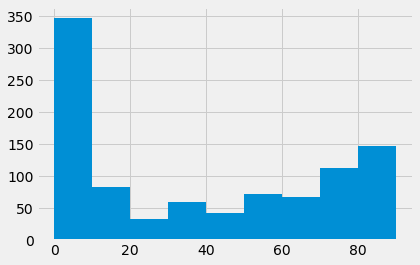

In [10]:
# Barack Obama FT
anes.loc[:,'ftobama'].hist(bins=range(0,100,10))

What is the shape of the plot?

**The plot is clearly bimodal, which makes sense, since backlash to Obama was a key part of the Republican
strategy in 2016; you can guess that Republican identifiers are on the left hand side and Democratic identifiers are on the right**

Report the 25th, 50th, and 75th percentiles. Keep in mind that valid answers have domain [0,100].

In [20]:
# Save column into an object called 'obama'
obama = anes[anes['ftobama'] < 101].loc[:,'ftobama'] # this was sort of tricky; 
                                                     # what if we want to specify range (0,100)?

# here is one way of making sure that all the values are in range
obama2 = np.clip(anes.loc[:,'ftobama'], 0, 100)
# Find 25th percentile
print('obama 25th percentile: ', np.percentile(obama, 25))
print('obama2 25th percentile: ', np.percentile(obama2, 25))

obama 25th percentile:  5.0
obama2 25th percentile:  5.0


In [17]:
# Find 50th percentile
np.percentile(obama, 50)

52.5

In [18]:
# Find 75th percentile
np.percentile(obama, 75)

87.0

What does this distrubtion tell you about the American peoples' thoughts on Obama?

**The distribution tells you that just taking a median would be deceiving, since the Obama feeling thermometer
responses are clustered at each end of the scale, which you can see by looking at the break points for the bottem quartile and top quartile, although the histogram is better still***

### Question 1

Now do the same for "Feeling Thermometer - Donald Trump."

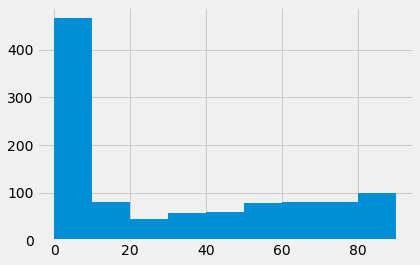

In [19]:
# Histogram
anes.loc[:,'fttrump'].hist(bins=range(0,100,10))

In [21]:
# Save an object called 'trump'
trump = np.clip(anes.loc[:,'fttrump'], 0, 100)

# Find 25th percentile
np.percentile(trump, 25)

2.0

In [22]:
# Find 50th percentile
np.percentile(trump, 50)

30.0

In [23]:
# Find 75th percentile
np.percentile(trump, 75)

72.0

How do the two distributions compare?

**Again the distribution is not the typical sort of Normal about a mean but is instead skewed; Trump's feeling thermometer rating is really almost unimodal at the bottom end.**

Both distributions have a significant amount of their points at the two extremes (0 or 100). What does this tell you about the standard deviation of the data? Do the American people have strong opinions regarding these two candidates?

**The variance is going to be quite large if you treat these as continuous measures. This is good evidence for polarization, which you could follow up on by looking at the different distributions for Dems & Reeps.**

## Bootstrap

Write code that resamples the "ftobama" distribution, then plot a histogram. Be sure to resample the number of rows that exist in the dataset, with replacement.

In [25]:
# Find number of rows
print('dataframe shape (rows,cols): ', anes.shape)
print('length of list variable obama: ', len(obama))

dataframe shape (rows,cols):  (1200, 594)
length of list variable obama:  1198


In [26]:
# Resample the data
pilot_resample = anes.sample(n=1198, replace=True)

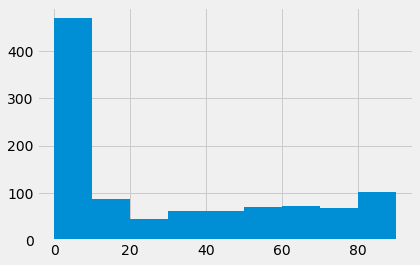

In [27]:
# Histogram
pilot_resample.loc[:,'fttrump'].hist(bins=range(0,100,10))

In [28]:
# 50th percentile/median
np.percentile(pilot_resample.loc[:,'fttrump'], 50)

28.0

### Question 2

How does the resampled median compare to the original median? Does this result make sense?

**The resampled median is pretty close to the original median, and since we drew with replacement we just drew a few more low values this time around.**

Now, define a function titled "bootstrap_median" that takes the original sample, the column name we're concerned with, and the number of resamples as arguments. The function should calculate simulated medians and return them in an array.

In [29]:
# Define a function "bootstrap_median" with arguments "original_sample", "label", and "replications" 
# that returns an array with the medians found in replications

def bootstrap_median(original_sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    just_one_column = original_sample.loc[:, label] # so this takes the df and label and selects the column
    medians = []
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample(n=just_one_column.size, replace=True)
        resampled_median = bootstrap_sample.quantile(.5)
        medians.append(resampled_median)

    return medians


Replicate the bootstrap 10,000 times, then save the results.

In [31]:
# Resample 10,000 times
medians = bootstrap_median(anes, 'fttrump', 10000)

Plot a histogram of the resampled medians, and plot the 95% confidence interval. (hint: to plot the confidence interval, try using the 2.5 percentile and 97.5 percentile values in a numpy array)

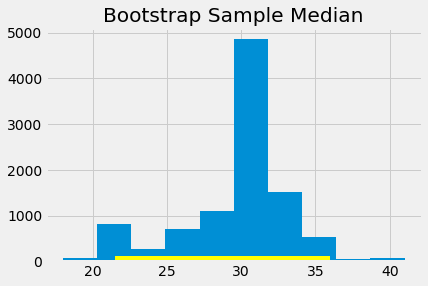

In [34]:
# Plot medians
# to do that, you have to convert the list of medians into a dataframe in line below
resampled_medians = pd.DataFrame(data={'Bootstrap Sample Median': medians})
resampled_medians.hist()
plots.plot(np.array([pd.Series(medians).quantile(q=.025), pd.Series(medians).quantile(q=.975)]), np.array([0, 0]), color='yellow', lw=10, zorder=1)

### Question 3

What can you infer about the likely population median given the above distribution?

**The likely population median is going to be between 21 and 36, since that is where 95 out of 100 draws yield in resampling of the data.**

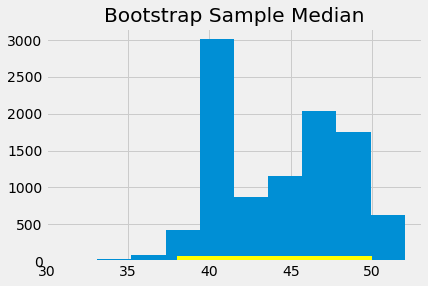

In [36]:
# Resample 10,000 times but this time for Hillary
hillary_medians = bootstrap_median(anes, 'fthrc', 10000)
hillary_resampled_medians = pd.DataFrame(data={'Bootstrap Sample Median': hillary_medians})
hillary_resampled_medians.hist()
plots.plot(np.array([pd.Series(hillary_medians).quantile(q=.025), pd.Series(hillary_medians).quantile(q=.975)]), np.array([0, 0]), color='yellow', lw=10, zorder=1)

**We can say that the underlying median is definitely higher for Hillary.**

Finally, write a simulation that constructs 100 confidence intervals. (Remember to use the 2.5 and 97.5 percentiles!)

In [37]:
# Construct 100 confidence intervals

# this is actually pretty hard and we should lay out the steps
# first you sample 500 rows of the obama scores with replacement, and store that in a df
# then you find the median in 5000 draws from the sample
# then you find the lower .025 and .975 bounds of that distribution of medians and store those in list
# repeat 100 times

left_ends = []
right_ends = []

for i in np.arange(100):
    first_sample = obama.sample(n=500, replace=True).to_frame() # first sample Obama FT scores and store in a df
    medians = bootstrap_median(first_sample, 'ftobama', 5000)
    left_ends.append(pd.Series(medians).quantile(q=.025))
    right_ends.append(pd.Series(medians).quantile(q=.975))

intervals = pd.DataFrame(data={"Left": left_ends, "Right": right_ends})
    

#### Question 4

Finally, plot 100 confidence intervals (stacked on top of each other). What can you conclude about the median?

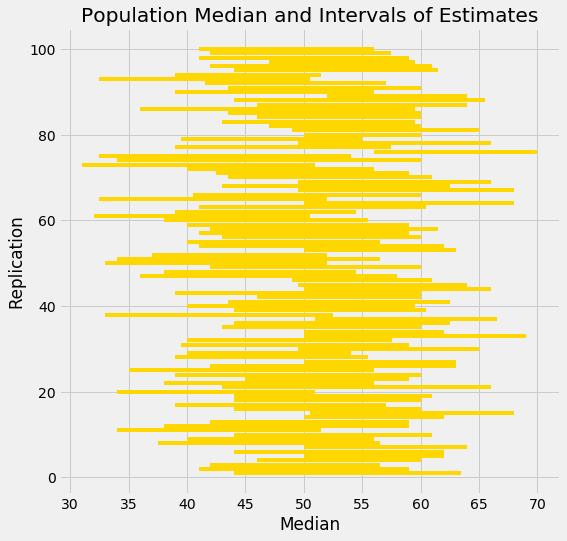

In [40]:
# Plot the confidence intervals
# again it is hard to figure out what plots.plot is doing; you are stepping thru rows of 
# the df you made above that has the left and right alpha values
plots.figure(figsize=(8,8))
for i in np.arange(100):
    ends = intervals.iloc[i,:]
    plots.plot(ends, np.array([i + 1, i + 1]), color='gold')
# plots.line(x=52.5) it would be nice to draw index line at Obama median but don't know how
plots.xlabel('Median')
plots.ylabel('Replication')
plots.title('Population Median and Intervals of Estimates');

**You can conclude that most of the time (something like 95 times out of 100 times) that we take a sample of 500 Obama FT scores, the estimated range of the median will contain the Obama feeling thermometer we measured in the population, 52.5**